In [2]:
# load eda pkgs
import pandas as pd 
import numpy as  np 

#load data visulization tools 
import seaborn as sns 
import matplotlib.pyplot as plt 
import mglearn 
%matplotlib  inline 

#load machine learning pkgs 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.svm  import SVC 
from sklearn.ensemble import RandomForestClassifier 





In [3]:
url = 'https://raw.githubusercontent.com/primaryobjects/voice-gender/master/voice.csv'
df = pd.read_csv(url)
df.head()
X = df.iloc[: , :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [4]:
#checking for null values

X.isnull().sum()
# no null values 


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

In [5]:
#dtypes
X.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
dtype: object

In [6]:
#every columb in numerical 
X.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<Axes: >

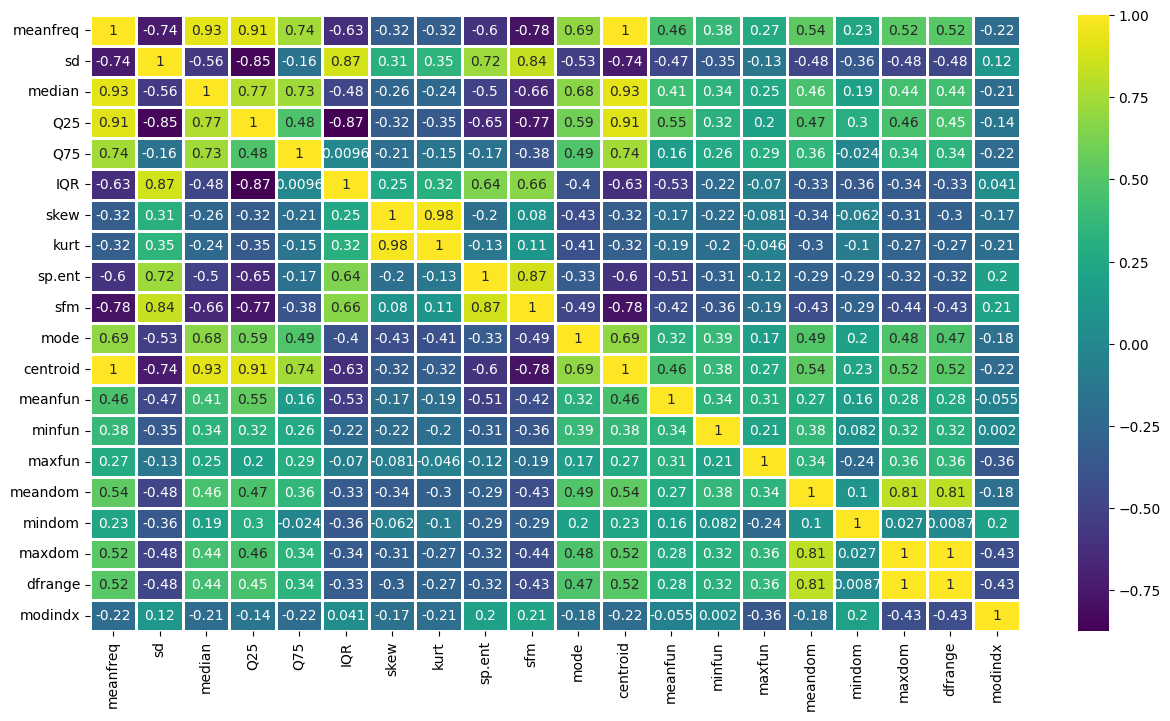

In [7]:
plt.figure(figsize= (15 , 8 ))
sns.heatmap(X.corr() , cmap = 'viridis' , linewidths= .8 , annot= True )

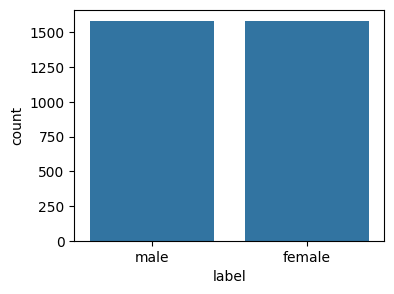

In [12]:
# here we see that a  lots of variable are corelated to each other 
#such corelated variables could baissenes to our algoriths 
# thus we need to remove these  as our machine learning algorithms work on  best in independent  variable 


#### checking label iblance or not 

In [ ]:

fig , ax = plt.subplots(figsize = (4 , 3 ))
sns.countplot(x = df['label']  )
plt.show()
#both classes are euqal thus good for us 


## Check if the gender / female are even differentiatable or not 

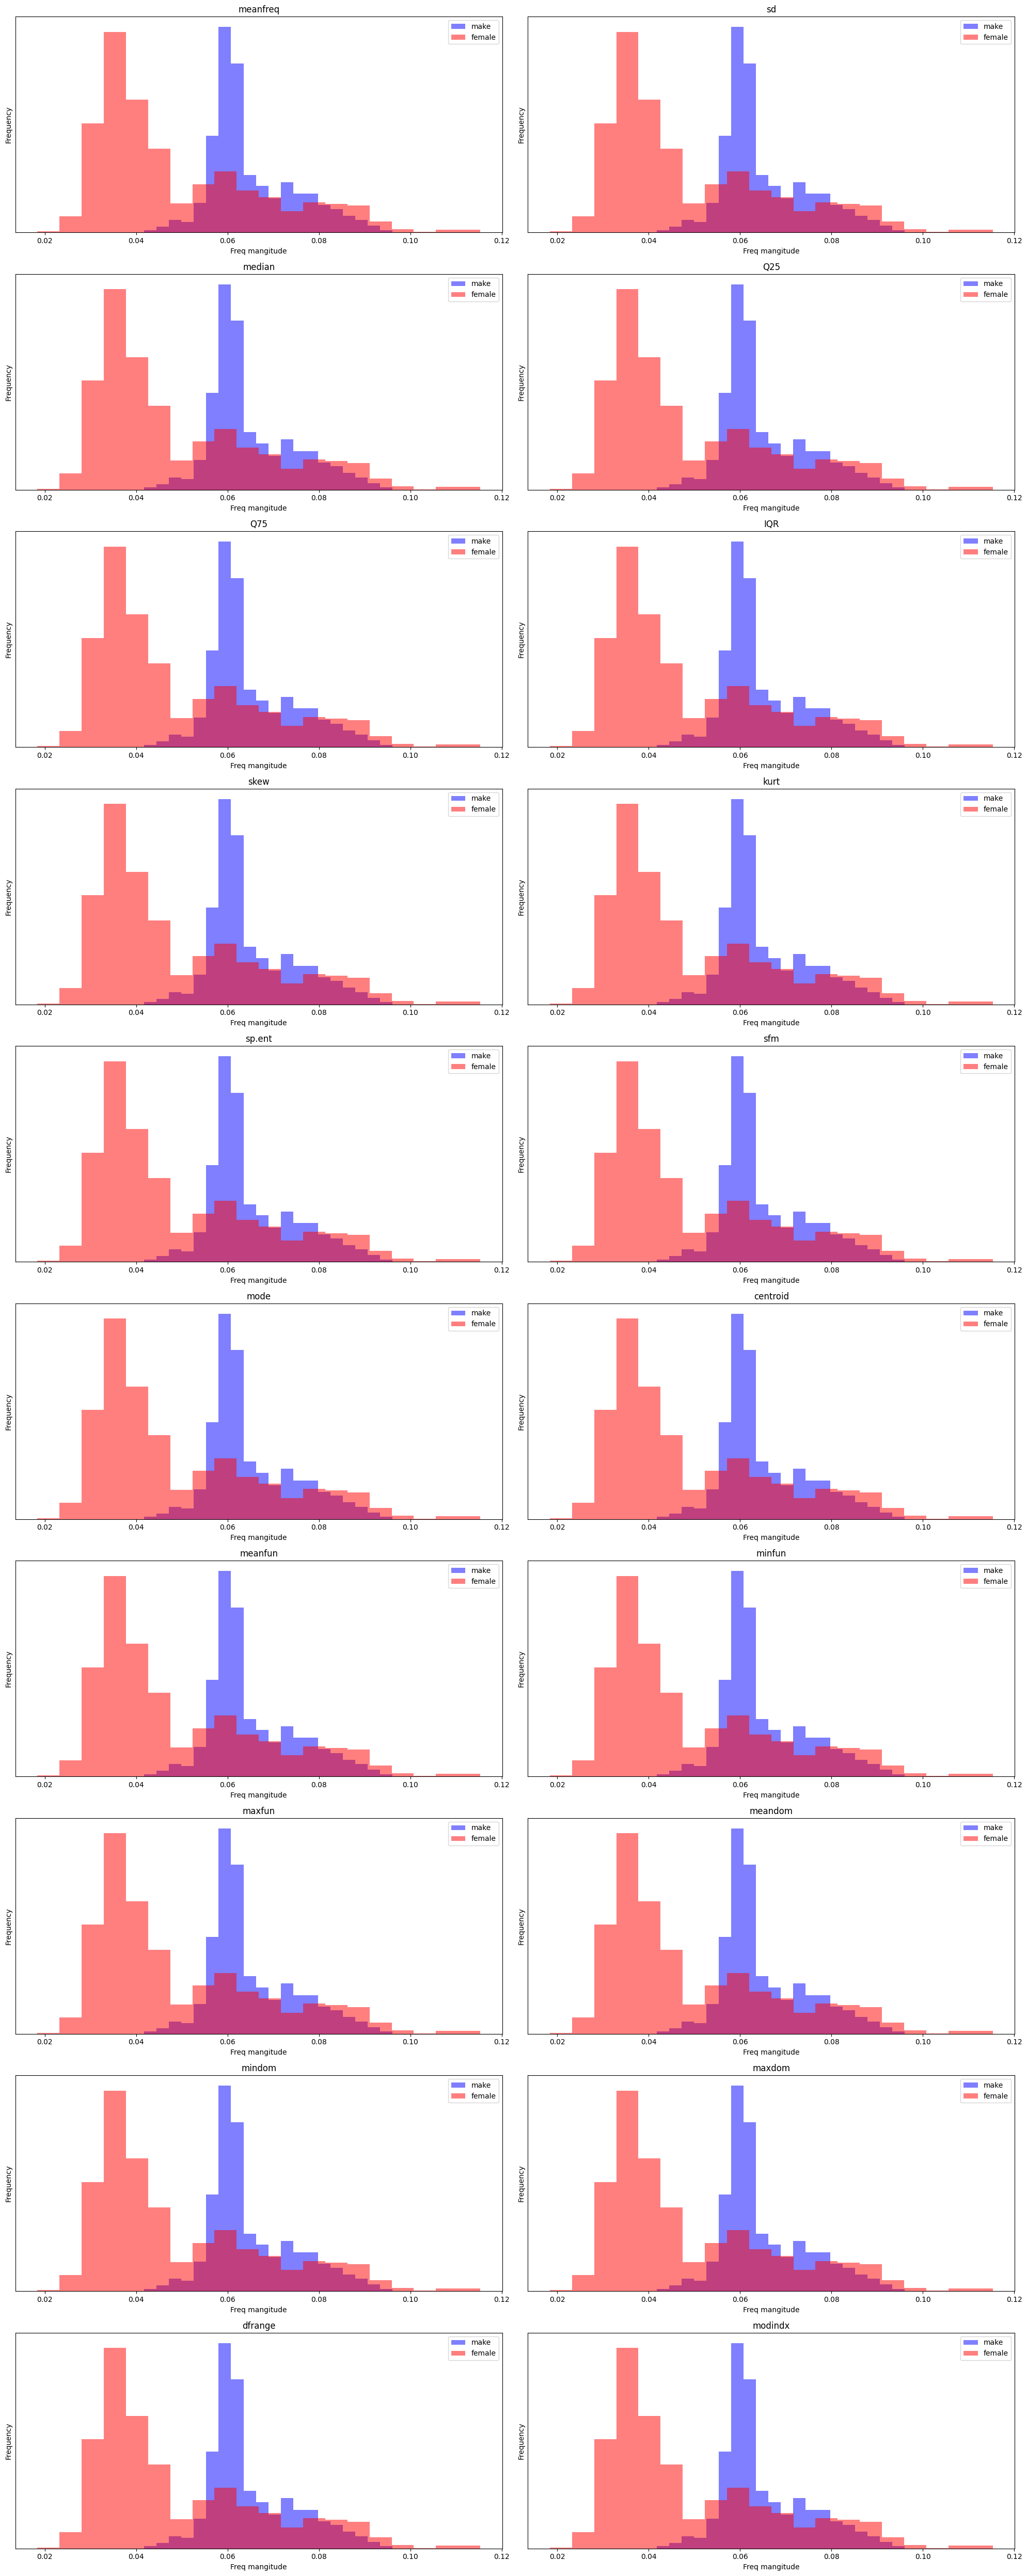

In [100]:
#plot the histogram 

#create a new dataframe contaning only male values
male = df.loc[df['label'] == 'male']

#create a new dataframe called female contaning only female values 
female = df.loc[df['label'] =='female']

#create 10 rows and 2 columns figure 
fig , axes = plt.subplots(10 , 2  , figsize = (20 , 50 ) )

#convert 10,2 into 10*2 two dimension axes array into  = 20  shape  on list 1-d array 
ax = axes.ravel()

#run loop len(ax times )

for i in range(len(ax)):
    
    ax[i].hist(x=male.iloc[:, 1], bins=20, color='blue', alpha=0.5, label='Male')
    ax[i].hist(x=female.iloc[:, 1], bins=20, color='red', alpha=0.5, label='Female')
    
    #text , label , title 
    ax[i].set_title(male.columns[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Freq mangitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(['make' , 'female'] ,loc = "best")
    
fig.tight_layout()


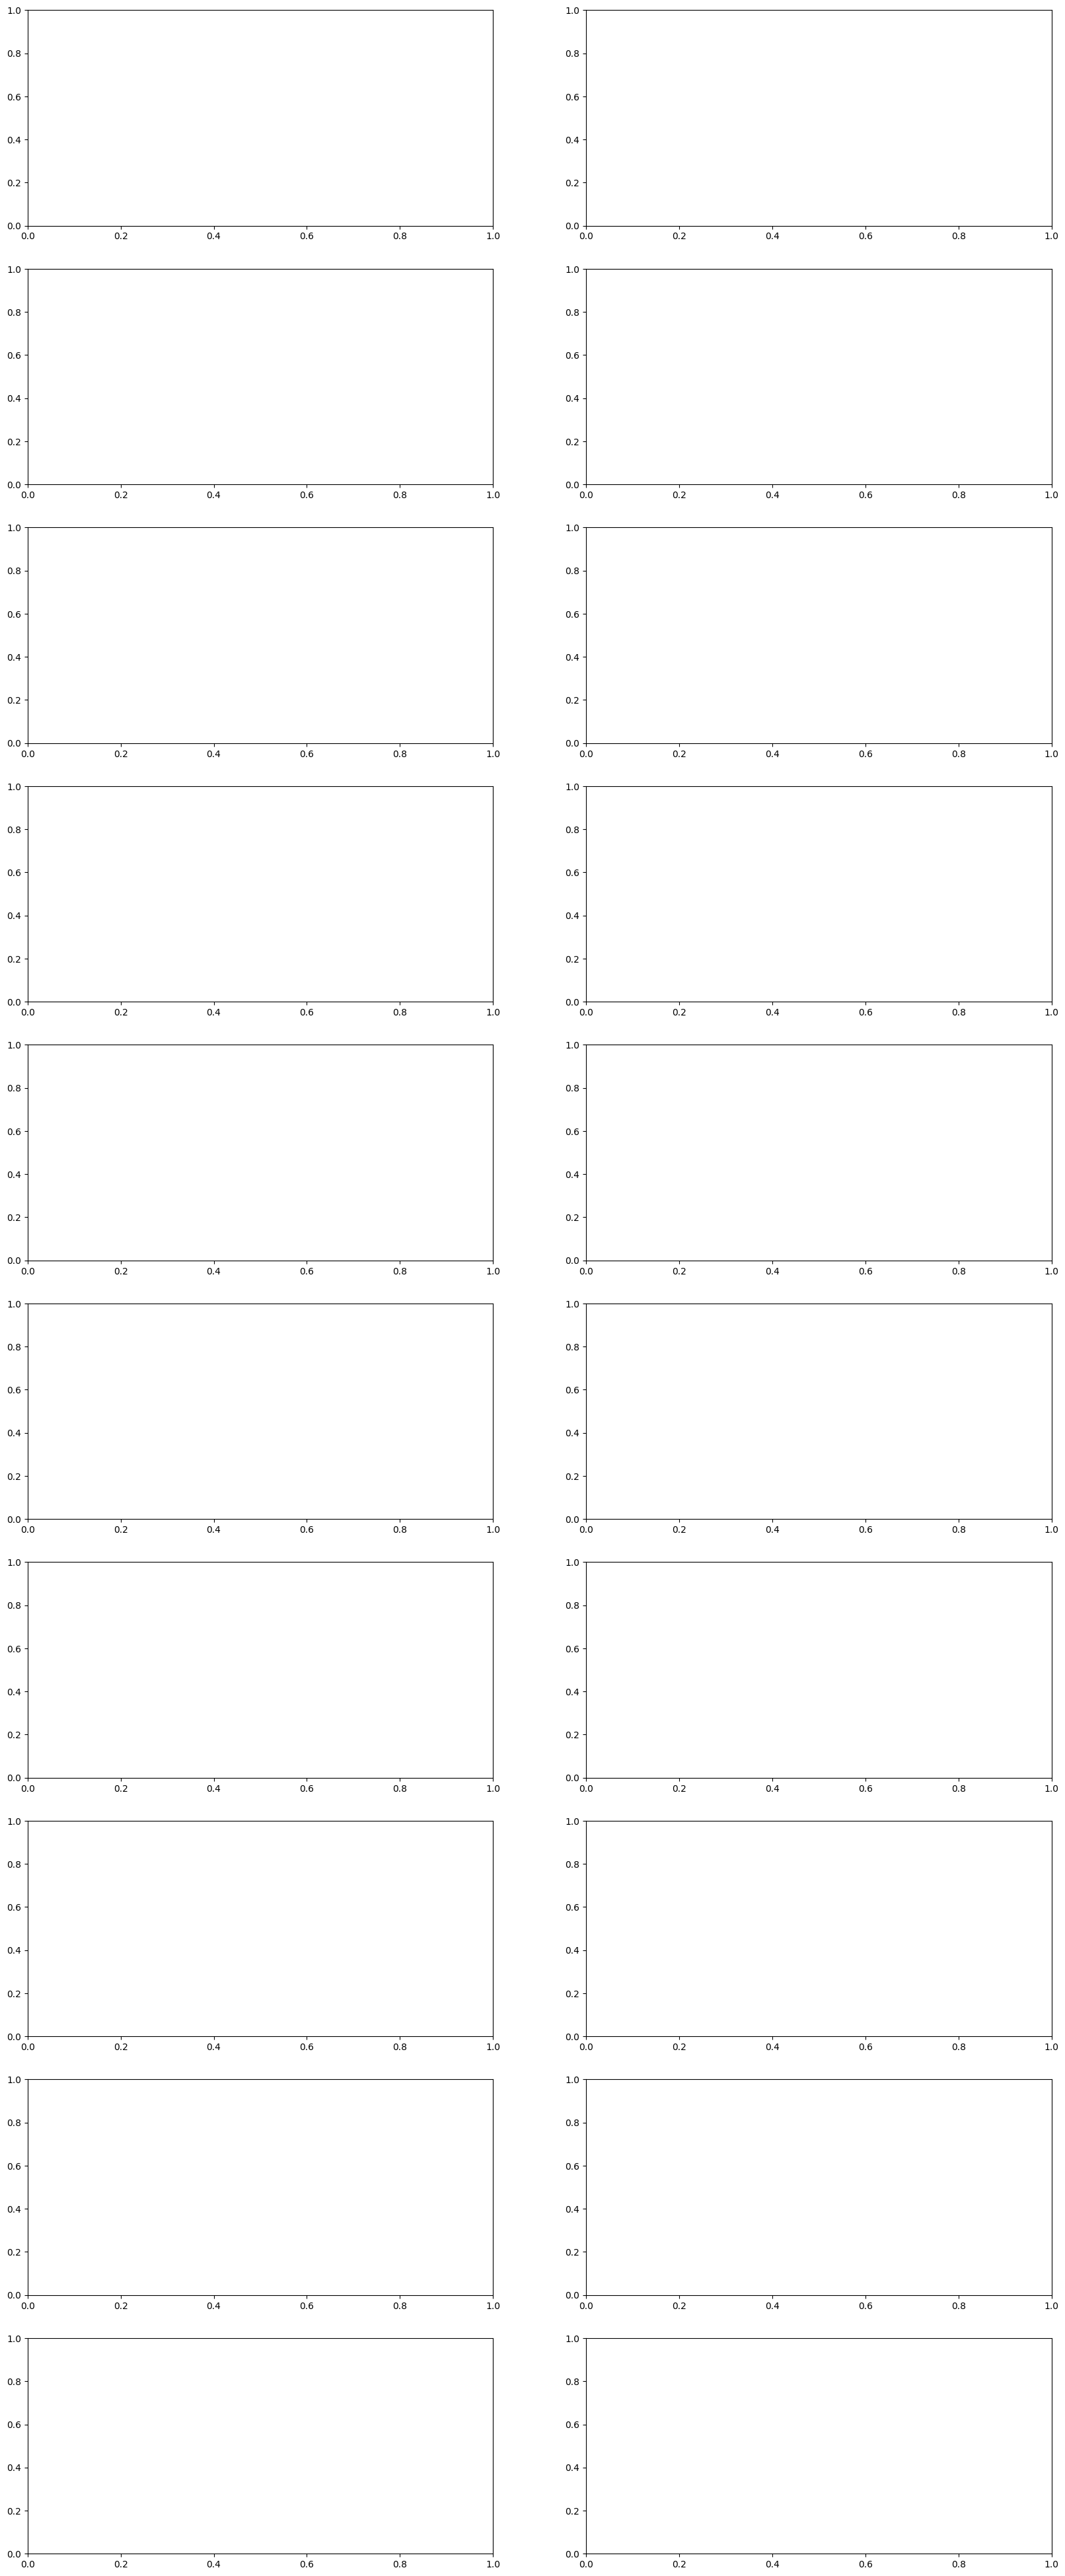

In [83]:
fig , axes = plt.subplots(10 , 2  ,  figsize = (20 , 50))

x = axes.ravel()

In [86]:
len(x)

20

'sd'